<a href="https://colab.research.google.com/github/PollyBecker/KcHouse/blob/main/Kc_house.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Definição do problema

- Base de dados de preço de aluguel de Casas muito popular no kaggle


# Etapa 1: Importação das bibliotecas

In [75]:
%tensorflow_version 2.x
import tensorflow as tf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
tf.__version__

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


'2.11.0'

# Etapa 2: Importação da base de dados

In [77]:
kc_house = pd.read_csv('/content/kc-house-data.csv')

In [78]:
kc_house.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [79]:
kc_house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [81]:
kc_house.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


# Etapa 3: Limpeza da base de dados

In [83]:
# vamos usar o datetime para facilitar nossas analises
kc_house.date = pd.to_datetime(kc_house.date)

In [84]:
kc_house.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


# Etapa 4

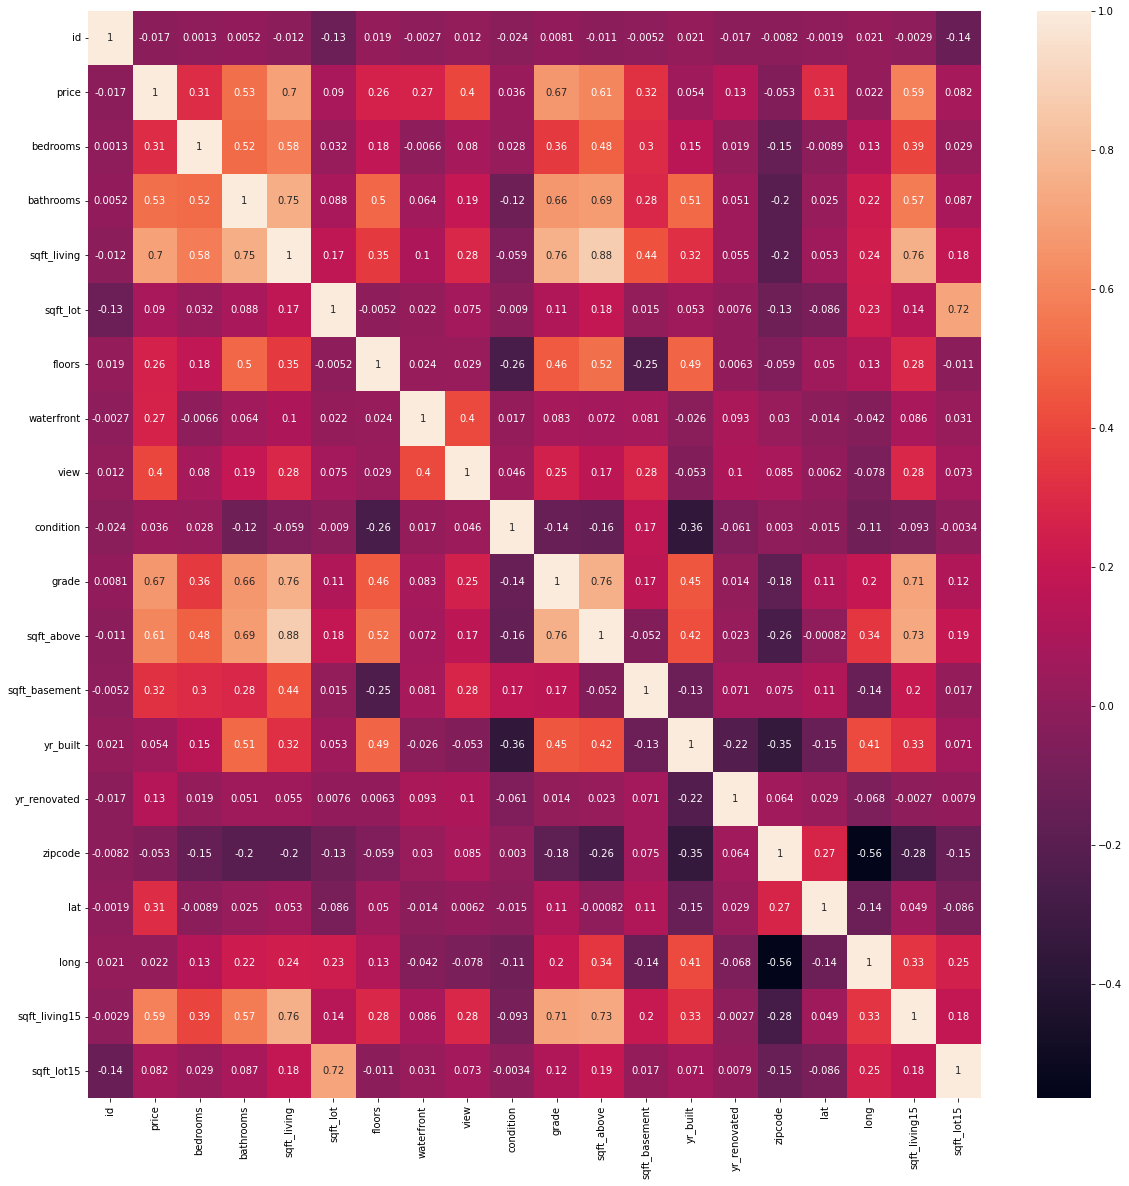

In [99]:
f, ax= plt.subplots(figsize=(20, 20))
sns.heatmap(kc_house.corr(), annot=True);

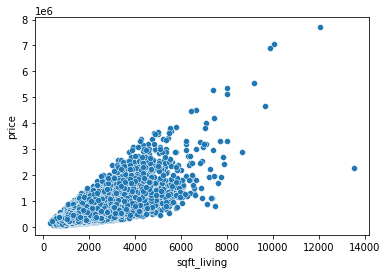

In [100]:
sns.scatterplot(x='sqft_living', y='price', data=kc_house);

In [111]:
# retirando algumas variaveis
house = kc_house[['price','sqft_living', 'bathrooms','bedrooms','grade','sqft_above','floors']]
house.head()

,price,sqft_living,bathrooms,bedrooms,grade,sqft_above,floors
0,221900.0,1180,1.00,3,7,1180,1.0
1,538000.0,2570,2.25,3,7,2170,2.0
2,180000.0,770,1.00,2,6,770,1.0
3,604000.0,1960,3.00,4,7,1050,1.0
4,510000.0,1680,2.00,3,8,1680,1.0


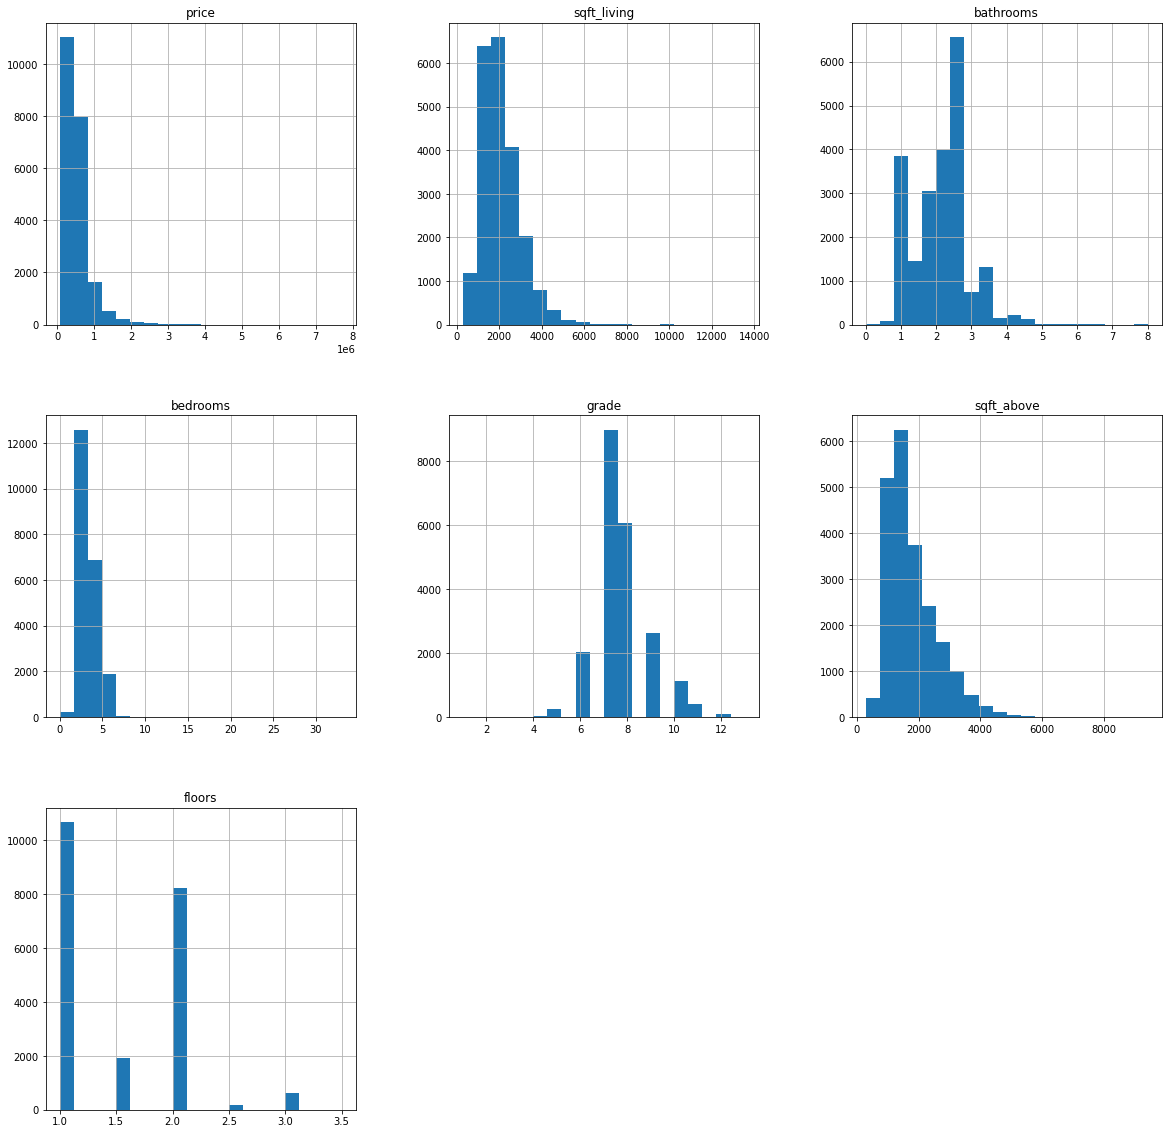

In [112]:
house.hist(bins=20, figsize=(20,20));

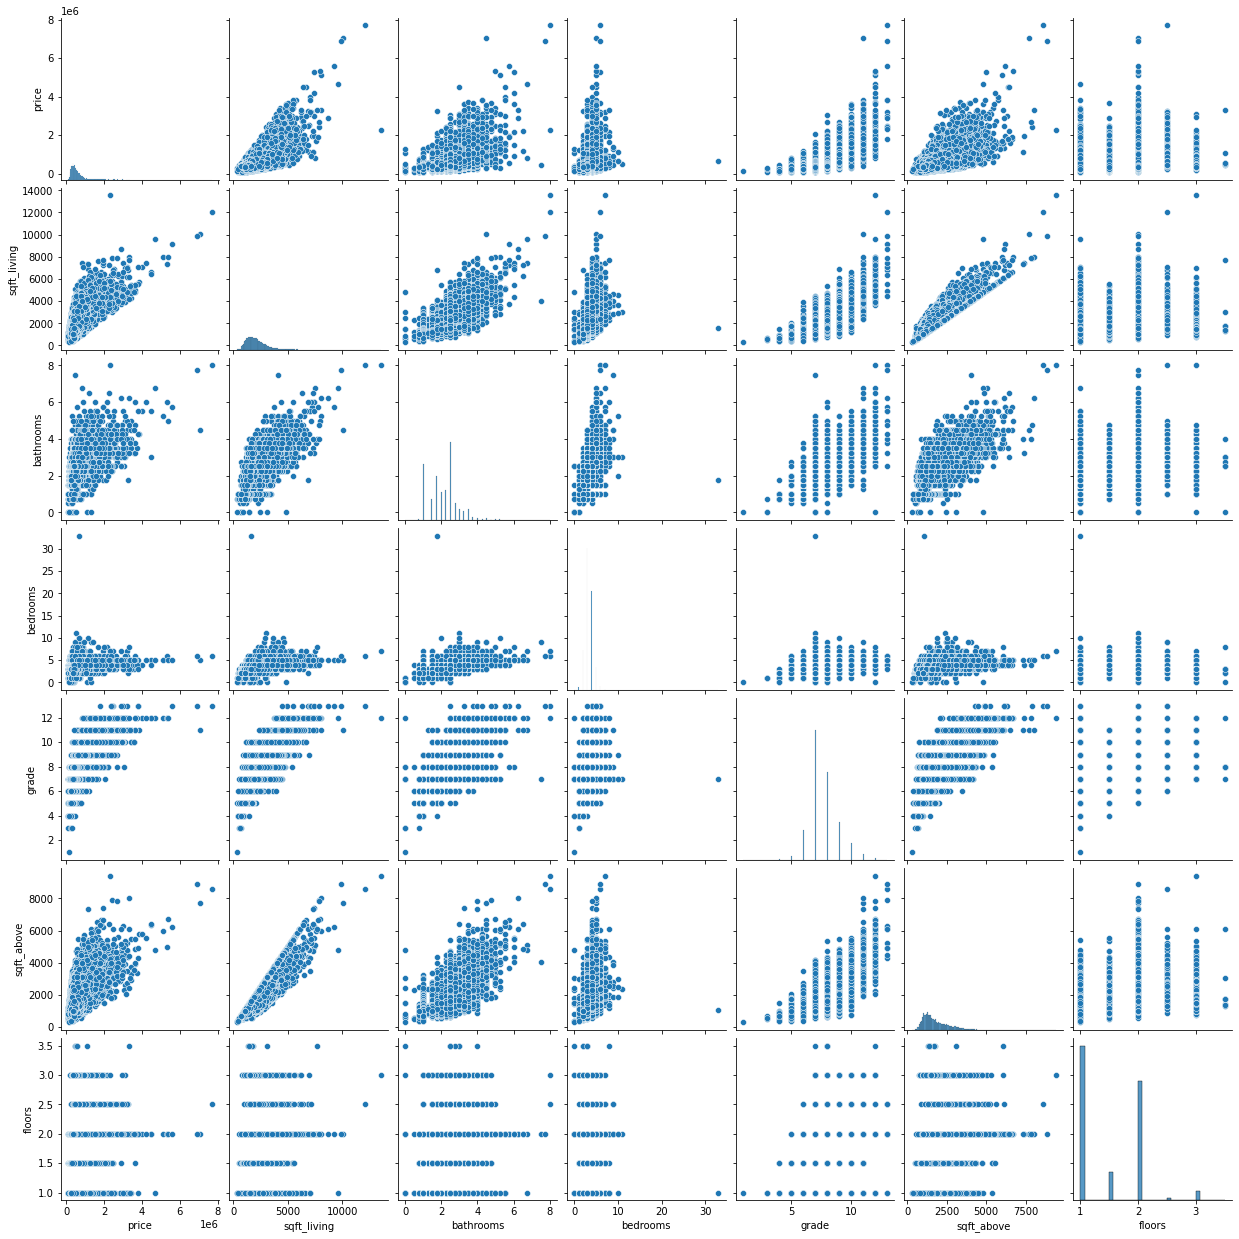

In [113]:
sns.pairplot(house);

# Etapa 5: Tratamento das bases de dados

In [114]:
X = house[['sqft_living', 'bathrooms','bedrooms','grade','sqft_above','floors']]

In [116]:
y= house.price

In [120]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [123]:
y = y.values.reshape(-1,1)

AttributeError: ignored

In [124]:
y_scaled = scaler.fit_transform(y)

In [125]:
y_scaled

array([[0.01926557],
       [0.06072131],
       [0.01377049],
       ...,
       [0.04289849],
       [0.04262295],
       [0.03278689]])

In [126]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size = 0.25)

In [127]:
X_train.shape

(16209, 6)

In [128]:
X_test.shape

(5404, 6)

# Etapa 6: Construção e treinamento do modelo

In [129]:
# modelo com três camadas ocultas e uma camada de saída que recebe 35 variáveis de entrada
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(units = 100, activation='relu', input_shape=(6,)))
model.add(tf.keras.layers.Dense(units=100, activation='relu'))
model.add(tf.keras.layers.Dense(units=100, activation='relu'))
model.add(tf.keras.layers.Dense(units=1, activation='linear'))

In [130]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 100)               700       
                                                                 
 dense_9 (Dense)             (None, 100)               10100     
                                                                 
 dense_10 (Dense)            (None, 100)               10100     
                                                                 
 dense_11 (Dense)            (None, 1)                 101       
                                                                 
Total params: 21,001
Trainable params: 21,001
Non-trainable params: 0
_________________________________________________________________


In [131]:
model.compile(optimizer='Adam', loss='mean_squared_error')

In [132]:
epochs_hist = model.fit(X_train, y_train, epochs = 100, batch_size = 50, validation_split=0.2)

Epoch 1/100
260/260 [==============================] - 3s 6ms/step - loss: 0.0010 - val_loss: 9.3492e-04
Epoch 2/100
260/260 [==============================] - 1s 4ms/step - loss: 9.2686e-04 - val_loss: 9.2449e-04
Epoch 3/100
260/260 [==============================] - 1s 4ms/step - loss: 9.1663e-04 - val_loss: 9.0989e-04
Epoch 4/100
260/260 [==============================] - 1s 4ms/step - loss: 8.6720e-04 - val_loss: 8.4932e-04
Epoch 5/100
260/260 [==============================] - 1s 4ms/step - loss: 8.8507e-04 - val_loss: 8.6628e-04
Epoch 6/100
260/260 [==============================] - 1s 4ms/step - loss: 8.6491e-04 - val_loss: 8.9997e-04
Epoch 7/100
260/260 [==============================] - 1s 4ms/step - loss: 8.5523e-04 - val_loss: 8.6329e-04
Epoch 8/100
260/260 [==============================] - 1s 4ms/step - loss: 8.7562e-04 - val_loss: 8.7910e-04
Epoch 9/100
260/260 [==============================] - 1s 4ms/step - loss: 8.6678e-04 - val_loss: 8.5528e-04
Epoch 10/100
260/260 [=

# Etapa 7: Avaliação do modelo 

In [133]:
epochs_hist.history.keys()

dict_keys(['loss', 'val_loss'])

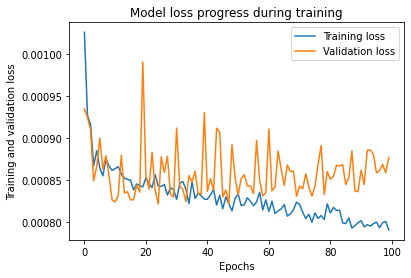

In [134]:
plt.plot(epochs_hist.history['loss'])
plt.plot(epochs_hist.history['val_loss'])
plt.title('Model loss progress during training')
plt.xlabel('Epochs')
plt.ylabel('Training and validation loss')
plt.legend(['Training loss', 'Validation loss']);

In [135]:
y_predict = model.predict(X_test)

169/169 [==============================] - 0s 1ms/step


In [136]:
y_predict

array([[0.06903239],
       [0.04013604],
       [0.10526457],
       ...,
       [0.04071426],
       [0.05313777],
       [0.03223131]], dtype=float32)

Text(0, 0.5, 'True values')

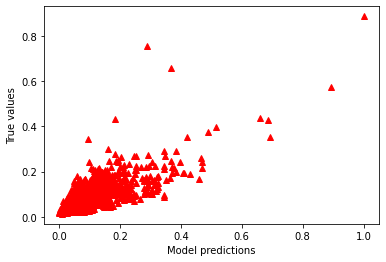

In [137]:
plt.plot(y_test, y_predict, "^", color = 'r')
plt.xlabel('Model predictions')
plt.ylabel('True values')

In [142]:
k = X_test.shape[1]
k

6

In [143]:
n = len(X_test)
n

5404

In [144]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt

In [145]:
# vamos fazer o calculo de erros
mae = mean_absolute_error(y_test_orig, y_predict_orig)
mse = mean_squared_error(y_test_orig, y_predict_orig)
rmse = sqrt(mse)
r2 = r2_score(y_test_orig, y_predict_orig)
adj_r2 = 1 - (1 - r2) * (n - 1) / (n - k - 1)

In [146]:
print("MAE: ", mae, "\nMSE: ", mse, "\nRMSE: ", rmse, "\nR2: ", r2, "\nADJ R2: ", adj_r2)

MAE:  148405.32940877127 
MSE:  61563599931.46926 
RMSE:  248120.1320559645 
R2:  0.6249315667193722 
ADJ R2:  0.6245145923633071


# Etapa 7
Vamos tentar melhorar o modelo aumentado o numero de caracteristicas na analise

In [185]:
X_new = kc_house[['sqft_living', 'bathrooms','bedrooms','grade','sqft_above','floors', 'sqft_lot','sqft_basement','waterfront','view','zipcode','yr_renovated','sqft_living15','sqft_lot15']]

In [186]:
X_scaled = scaler.fit_transform(X_new)

In [187]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size = 0.25)

In [189]:
# modelo com três camadas ocultas e uma camada de saída que recebe 35 variáveis de entrada
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(units = 100, activation='relu', input_shape=(14,)))
model.add(tf.keras.layers.Dense(units=100, activation='relu'))
model.add(tf.keras.layers.Dense(units=100, activation='relu'))
model.add(tf.keras.layers.Dense(units=1, activation='linear'))

In [190]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_28 (Dense)            (None, 100)               1500      
                                                                 
 dense_29 (Dense)            (None, 100)               10100     
                                                                 
 dense_30 (Dense)            (None, 100)               10100     
                                                                 
 dense_31 (Dense)            (None, 1)                 101       
                                                                 
Total params: 21,801
Trainable params: 21,801
Non-trainable params: 0
_________________________________________________________________


In [191]:
model.compile(optimizer='Adam', loss='mean_squared_error')

In [192]:
epochs_hist = model.fit(X_train, y_train, epochs = 100, batch_size = 50, validation_split=0.2)

Epoch 1/100
260/260 [==============================] - 2s 4ms/step - loss: 9.9501e-04 - val_loss: 0.0010
Epoch 2/100
260/260 [==============================] - 1s 3ms/step - loss: 7.4281e-04 - val_loss: 7.7718e-04
Epoch 3/100
260/260 [==============================] - 1s 4ms/step - loss: 6.9491e-04 - val_loss: 8.6938e-04
Epoch 4/100
260/260 [==============================] - 1s 3ms/step - loss: 6.8261e-04 - val_loss: 8.9074e-04
Epoch 5/100
260/260 [==============================] - 1s 4ms/step - loss: 6.6859e-04 - val_loss: 7.6429e-04
Epoch 6/100
260/260 [==============================] - 1s 4ms/step - loss: 6.5779e-04 - val_loss: 7.4603e-04
Epoch 7/100
260/260 [==============================] - 1s 4ms/step - loss: 6.2639e-04 - val_loss: 7.6345e-04
Epoch 8/100
260/260 [==============================] - 1s 5ms/step - loss: 5.9998e-04 - val_loss: 7.2741e-04
Epoch 9/100
260/260 [==============================] - 2s 6ms/step - loss: 5.9900e-04 - val_loss: 7.6573e-04
Epoch 10/100
260/260 [=

In [193]:
epochs_hist.history.keys()

dict_keys(['loss', 'val_loss'])

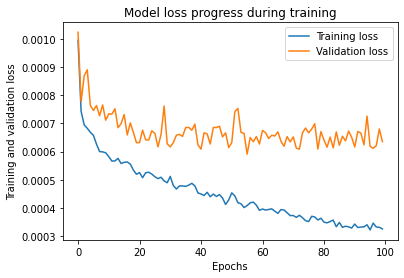

In [194]:
plt.plot(epochs_hist.history['loss'])
plt.plot(epochs_hist.history['val_loss'])
plt.title('Model loss progress during training')
plt.xlabel('Epochs')
plt.ylabel('Training and validation loss')
plt.legend(['Training loss', 'Validation loss']);

In [195]:
y_predict = model.predict(X_test)

169/169 [==============================] - 0s 2ms/step


Text(0, 0.5, 'True values')

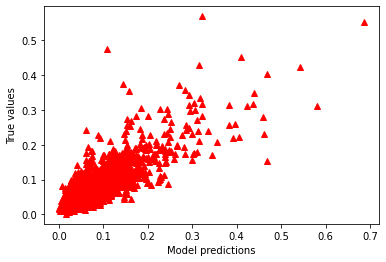

In [196]:
plt.plot(y_test, y_predict, "^", color = 'r')
plt.xlabel('Model predictions')
plt.ylabel('True values')

In [197]:
k = X_test.shape[1]
n = len(X_test)
n

5404

In [198]:
# vamos fazer o calculo de erros
mae = mean_absolute_error(y_test, y_predict)
mse = mean_squared_error(y_test, y_predict)
rmse = sqrt(mse)
r2 = r2_score(y_test, y_predict)
adj_r2 = 1 - (1 - r2) * (n - 1) / (n - k - 1)

In [199]:
print("MAE: ", mae, "\nMSE: ", mse, "\nRMSE: ", rmse, "\nR2: ", r2, "\nADJ R2: ", adj_r2)

MAE:  0.015394199836061252 
MSE:  0.0006281281524927055 
RMSE:  0.02506248496244348 
R2:  0.7172575729628183 
ADJ R2:  0.7165230407715917
